# Compare 202405-2xrez to 202405 Bathymetry

Detailed, tile by tile, comparison of 202405-2xrez and 202405 bathymetries including preliminary river files.
This notebook is used iteratively with the `Process202405-2xrezBathymetry.ipynb` notebook to identify features
in the 2xrez bathymetry that need to be adjusted in the latter notebook.

This notebook is based on the ones that Susan created to do the same thing during the creation of the 202108
bathymetry (which was known as 202103d at the time):
* `analysis-susan/notebooks/bathymetry/lookat201702_201803d_andrivers.ipynb`
* `analysis-susan/notebooks/bathymetry/lookat201702_201803d_middle.ipynb`
* `analysis-susan/notebooks/bathymetry/lookat201702_201803d_upper.ipynb`

The conda environment file for this notebook is `environment-2xrez.yaml`.

In [1]:
from pathlib import Path
import sys

import cmocean.cm as cm
import matplotlib.pyplot as plt
import numpy
import xarray

from salishsea_tools import viz_tools

import matplotlib.colors as matcolors
import matplotlib.cm as cmx

Python and library versions:

In [2]:
import bottleneck
import cmocean
import h5netcdf
import h5py
import matplotlib

print(f"Python {sys.version=}")
print(f"{numpy.__version__=}")
print(f"{xarray.__version__=}")
print(f"{bottleneck.__version__=}")
print(f"{h5netcdf.__version__=}")
print(f"{h5py.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{cmocean.__version__=}")

Python sys.version='3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:38:13) [GCC 12.3.0]'
numpy.__version__='1.26.4'
xarray.__version__='2024.6.0'
bottleneck.__version__='1.4.0'
h5netcdf.__version__='1.3.0'
h5py.__version__='3.11.0'
matplotlib.__version__='3.8.4'
cmocean.__version__='v3.0.3'


In [3]:
# isolate the probable user-specific part of repo paths to make the notebook portable
repos_prefix = Path("/media/doug/warehouse/MEOPAR/")

In [4]:
bathy_paths = {
    "final_202405": repos_prefix / "grid" / "bathymetry_202405.nc",
    "dbl_202405": repos_prefix / "grid" / "bathymetry_double_202405_base.nc",
}

In [51]:
bathy = xarray.open_dataset(repos_prefix / "grid" / "bathymetry_202405.nc", engine="h5netcdf").Bathymetry

dbl_bathy_unmasked = xarray.open_dataset(repos_prefix / "grid" / "bathymetry_double_202405_base.nc", engine="h5netcdf").Bathymetry
dbl_bathy = dbl_bathy_unmasked.where(dbl_bathy_unmasked!=0, numpy.nan)

In [59]:
def plot_tile(x_min_max, y_slices, bathy, dbl_bathy):
    x_slices = {
        "sgl": slice(*x_min_max),
        "dbl": slice(*x_min_max * 2),
    }

    fig, (ax_sgl, ax_dbl) = plt.subplots(1, 2, figsize=(12, 6))
    bathy.isel(y=y_slices["sgl"], x=x_slices["sgl"]).plot(ax=ax_sgl, cmap="nipy_spectral", vmax=15)
    ax_sgl.set_title("bathymetry_202405")
    dbl_bathy.isel(y=y_slices["dbl"], x=x_slices["dbl"]).plot(ax=ax_dbl, cmap="nipy_spectral", vmax=15)
    ax_dbl.set_title("bathymetry_double_202405_base")
    fig.tight_layout()


## Row 0

In [44]:
y_min_max = numpy.array([0, 50])
y_slices = {
    "sgl": slice(*y_min_max),
    "dbl": slice(*y_min_max *2),
}

## Tile 0, 0

* all land

## Tile 0, 1

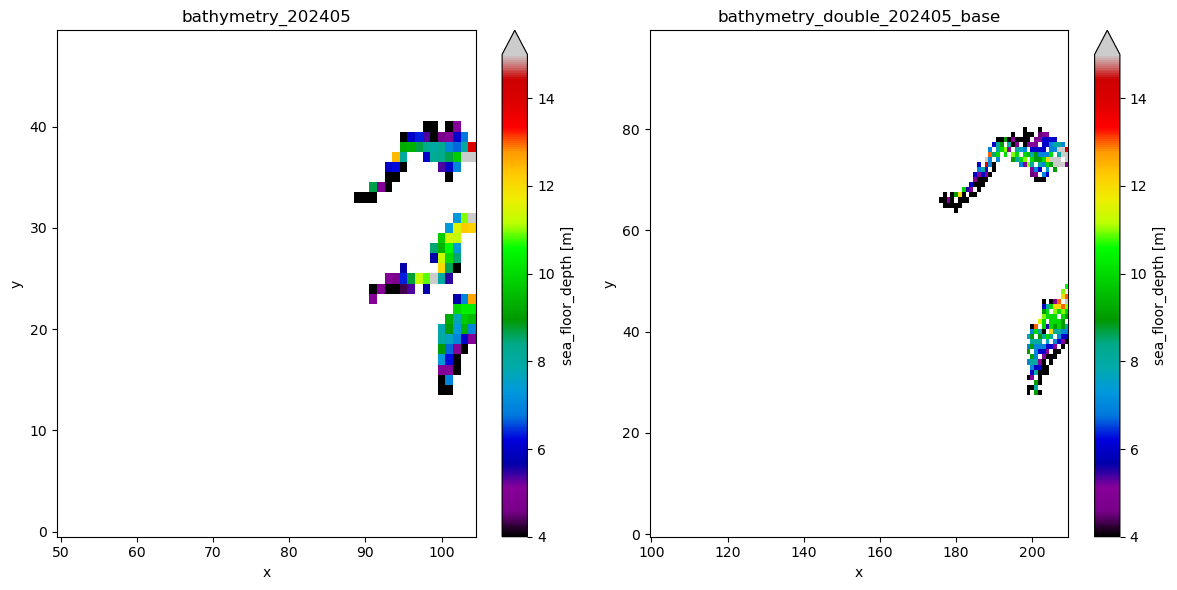

In [63]:
plot_tile(numpy.array([50, 105]), y_slices, bathy, dbl_bathy)

## Tile 0, 2

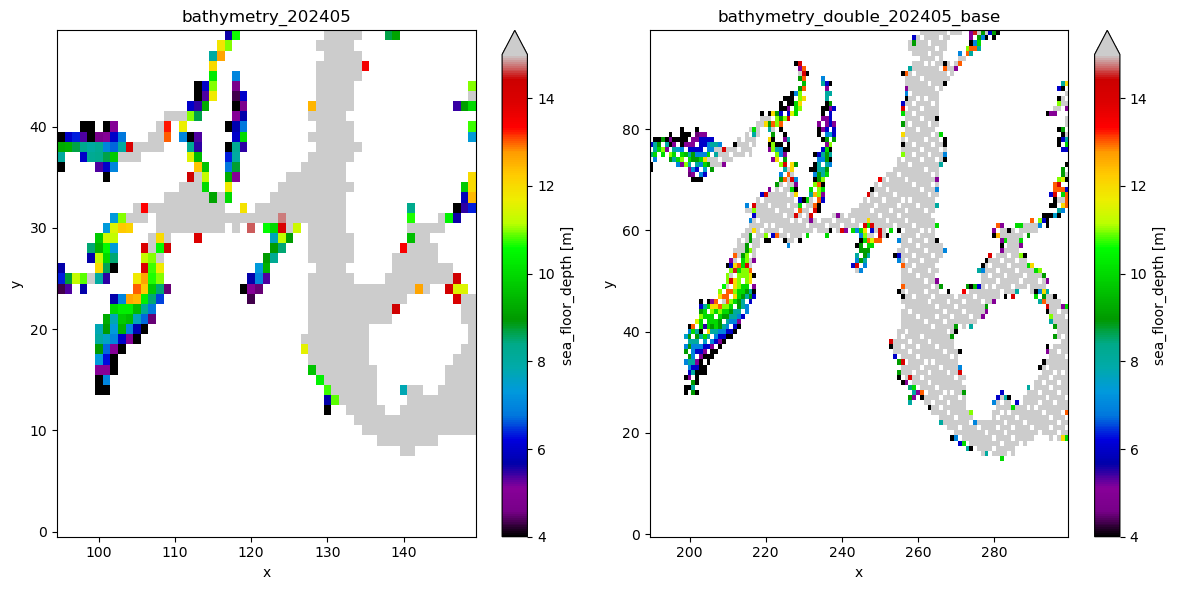

In [62]:
plot_tile(numpy.array([95, 150]), y_slices, bathy, dbl_bathy)

Puget Sound has problems.
At the very least, the stippling has to be resolved.

So, let's skip farther north...

## Row 5

Juan de Fuca Strait

In [69]:
y_min_max = numpy.array([300, 330])
y_slices = {
    "sgl": slice(*y_min_max),
    "dbl": slice(*y_min_max *2),
}

## Tile 5, 0

* all land


## Tile 5, 1

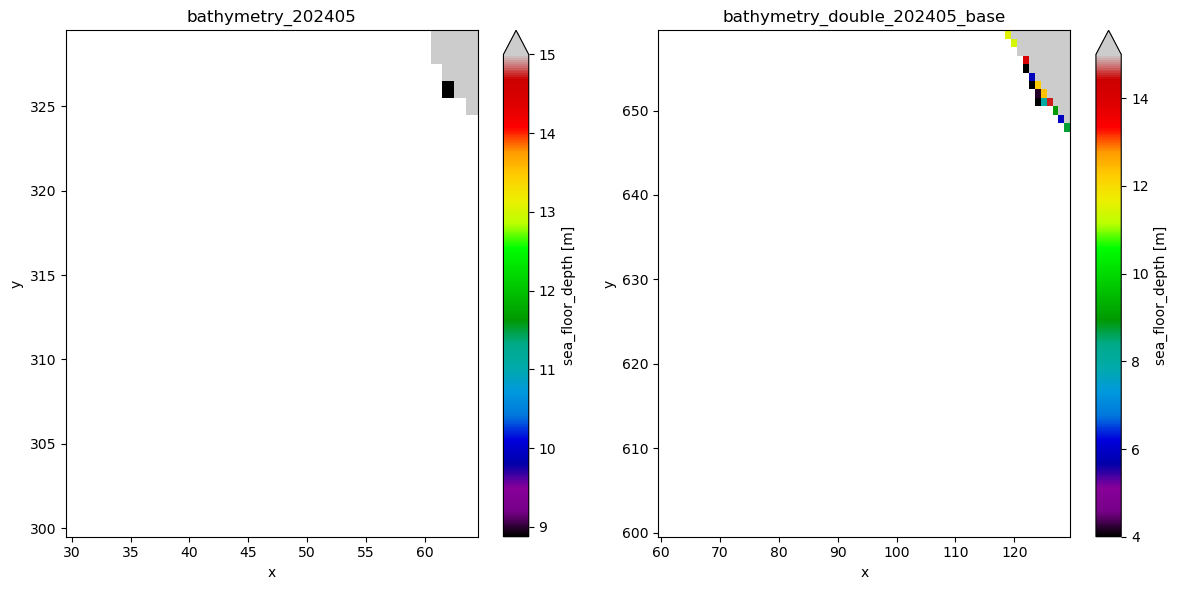

In [71]:
plot_tile(numpy.array([30, 65]), y_slices, bathy, dbl_bathy)

## Tile 5, 2

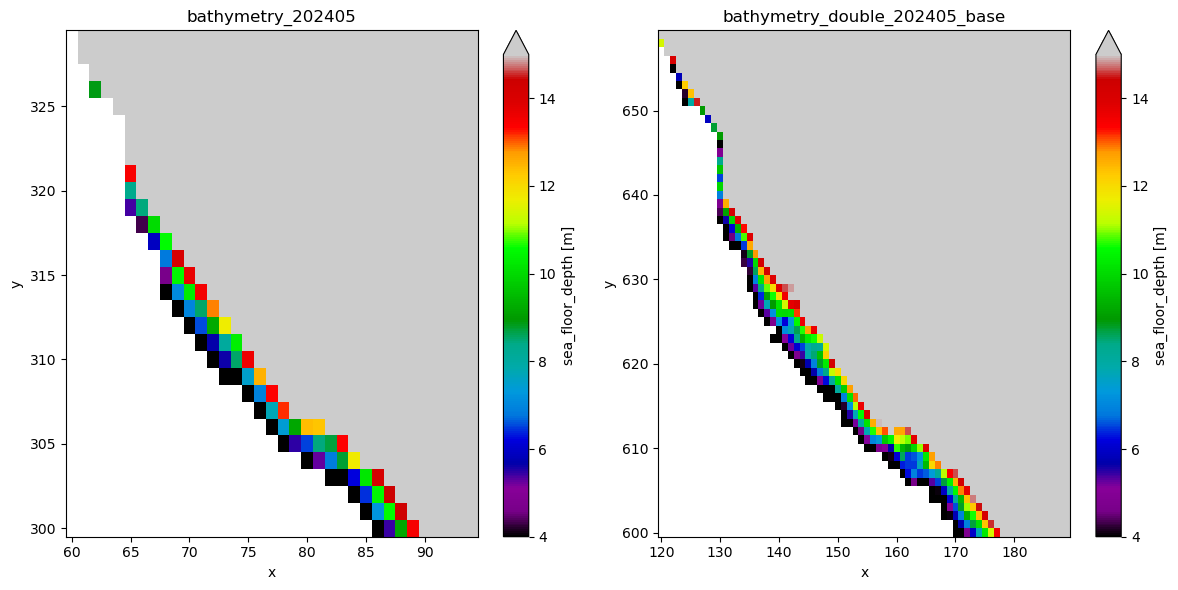

In [72]:
plot_tile(numpy.array([60, 95]), y_slices, bathy, dbl_bathy)

## Tile 5, 3

* all land

## Tile 5, 4

Sooke Harbour

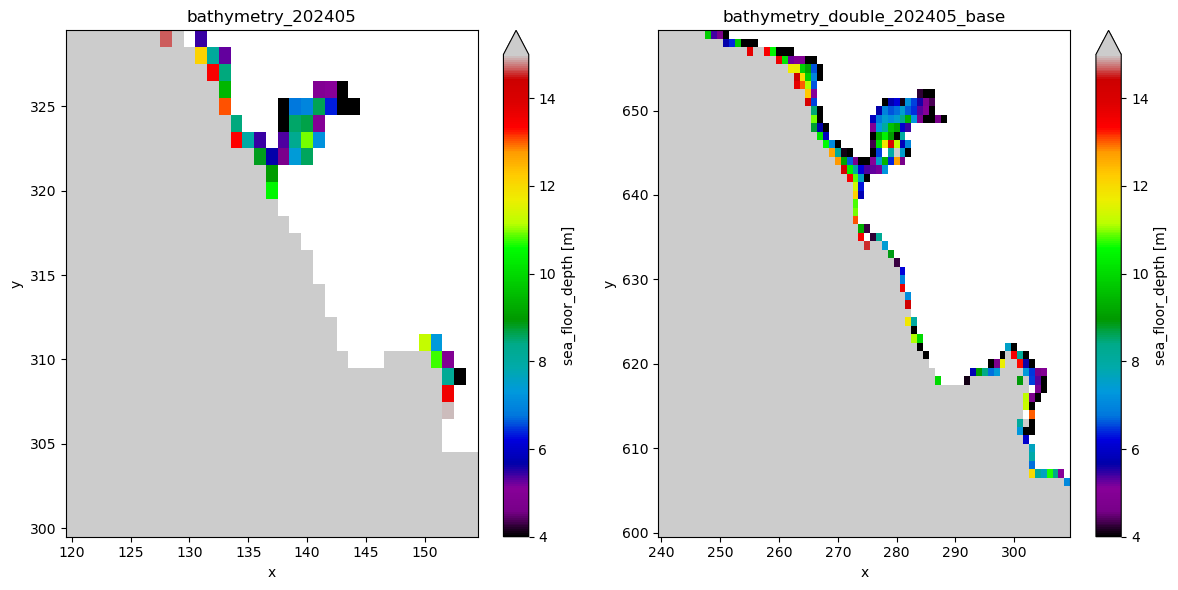

In [76]:
plot_tile(numpy.array([120, 155]), y_slices, bathy, dbl_bathy)

## Tile 5, 5

Metchosin

connect island that is really end of William Head

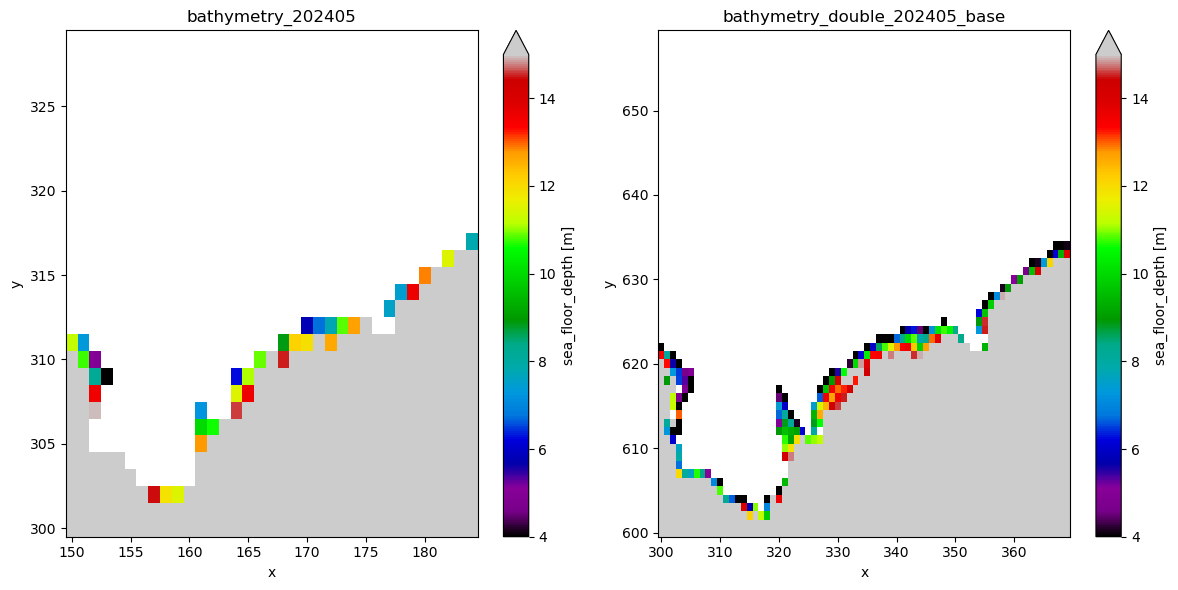

In [77]:
plot_tile(numpy.array([150, 185]), y_slices, bathy, dbl_bathy)

## Tile 5, 6

Esquimalt and Victoria

* connect islands to make Esquimalt Point

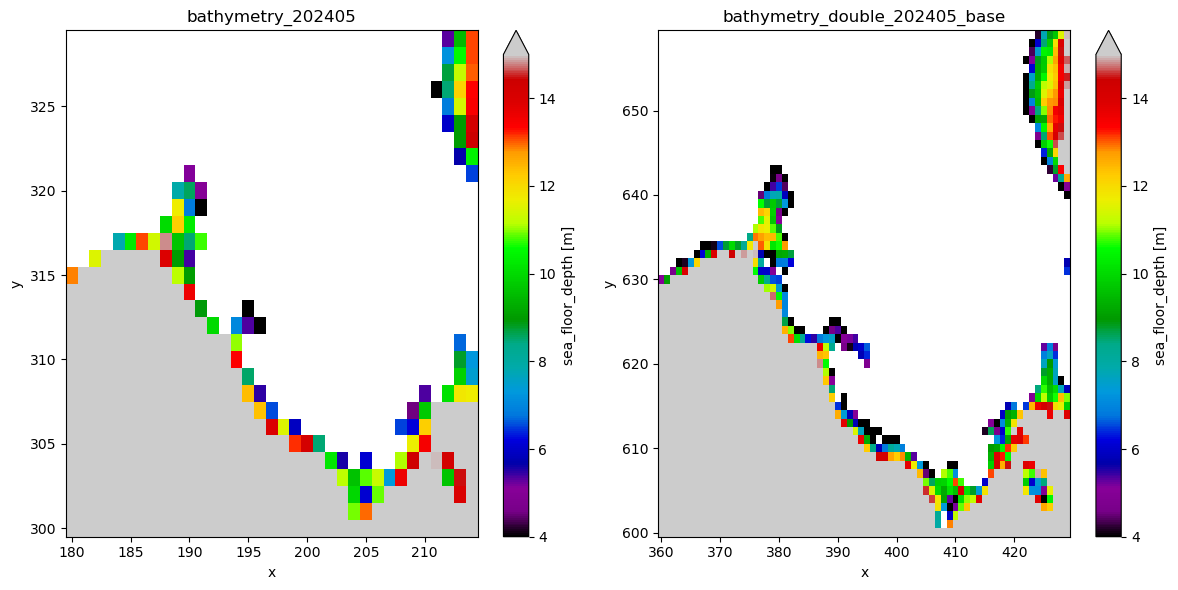

In [78]:
plot_tile(numpy.array([180, 215]), y_slices, bathy, dbl_bathy)

## Tile 5, 7

Haro Strait

* fix Discovery Island
* Make esat Chatham Island T-shaped

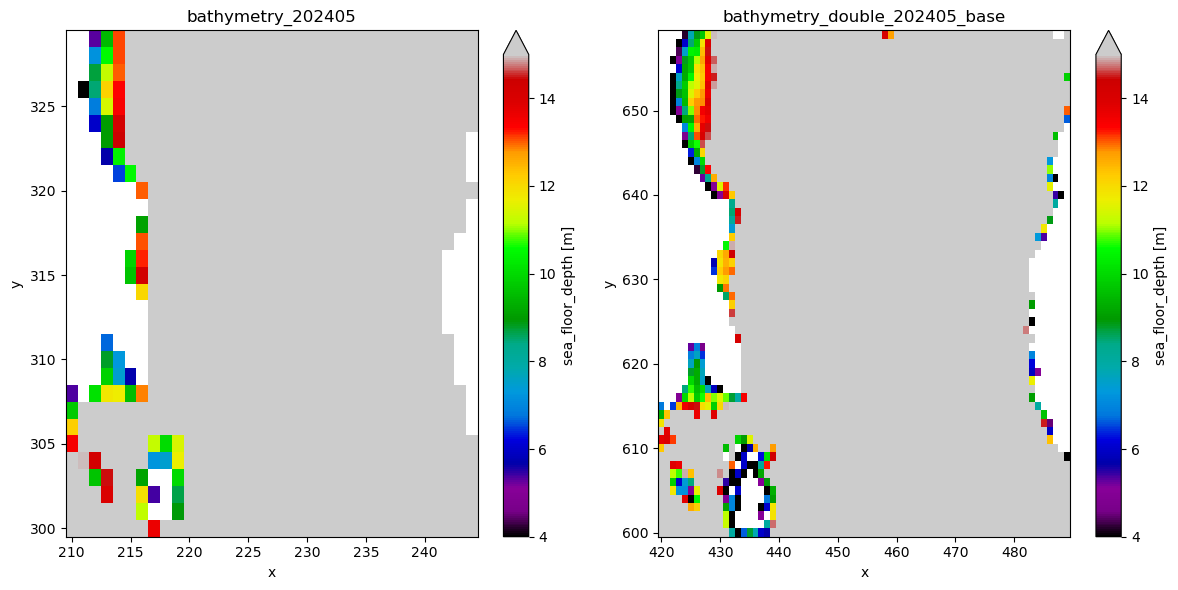

In [79]:
plot_tile(numpy.array([210, 245]), y_slices, bathy, dbl_bathy)

## Tile 5, 8

San Juan Island


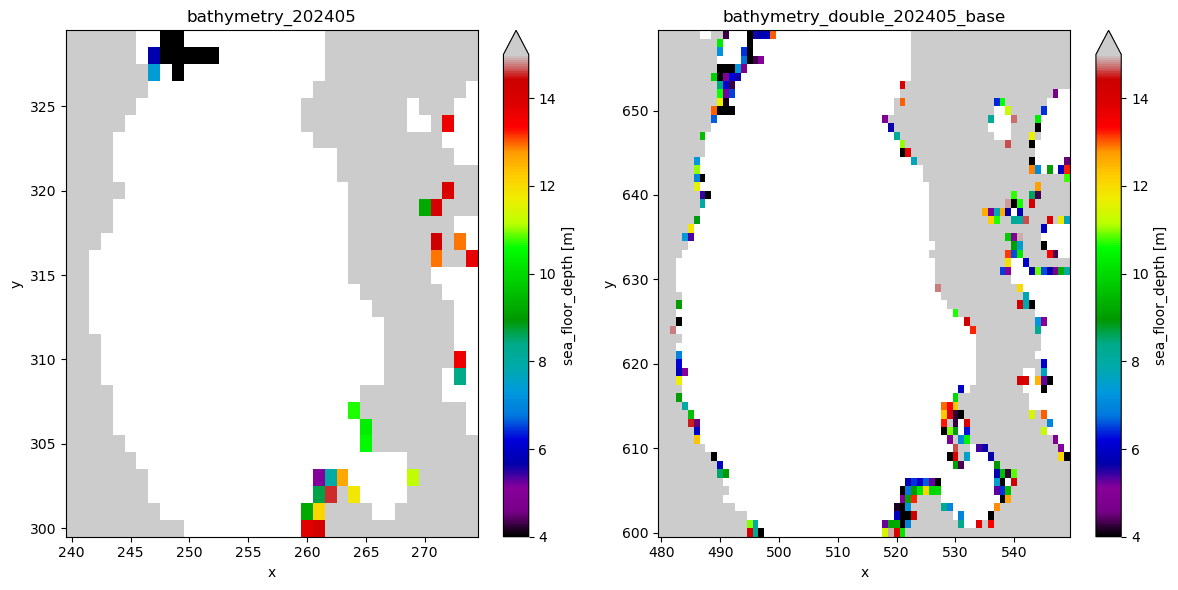

In [80]:
plot_tile(numpy.array([240, 275]), y_slices, bathy, dbl_bathy)

## Tile 5, 9

Orcas Island


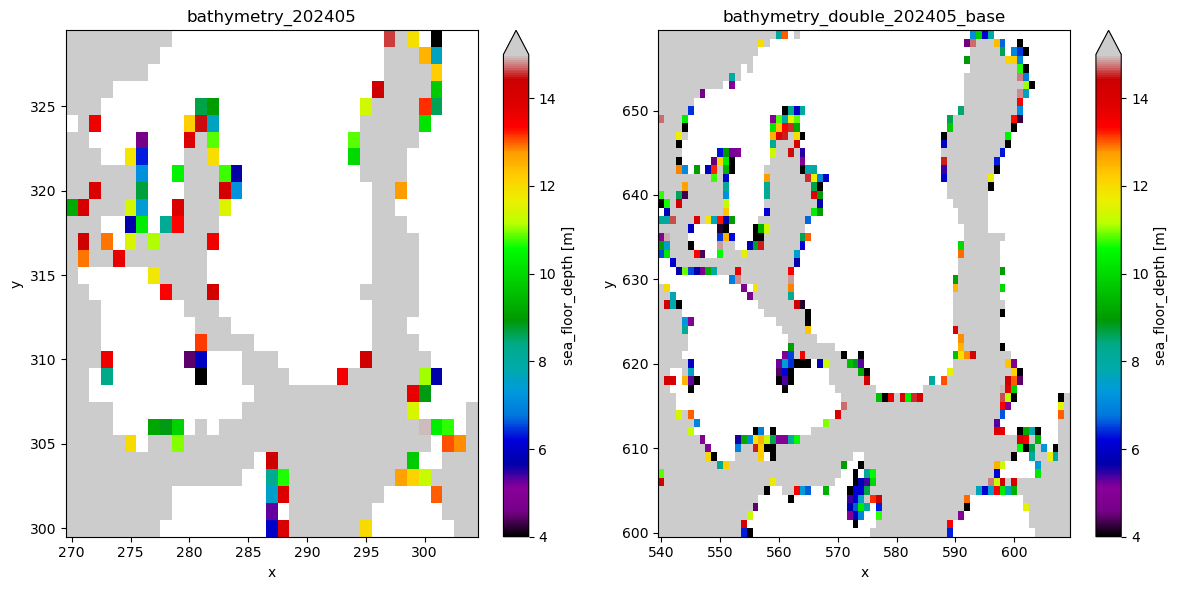

In [81]:
plot_tile(numpy.array([270, 305]), y_slices, bathy, dbl_bathy)

## Tile 5, 10

North Rossario Strait


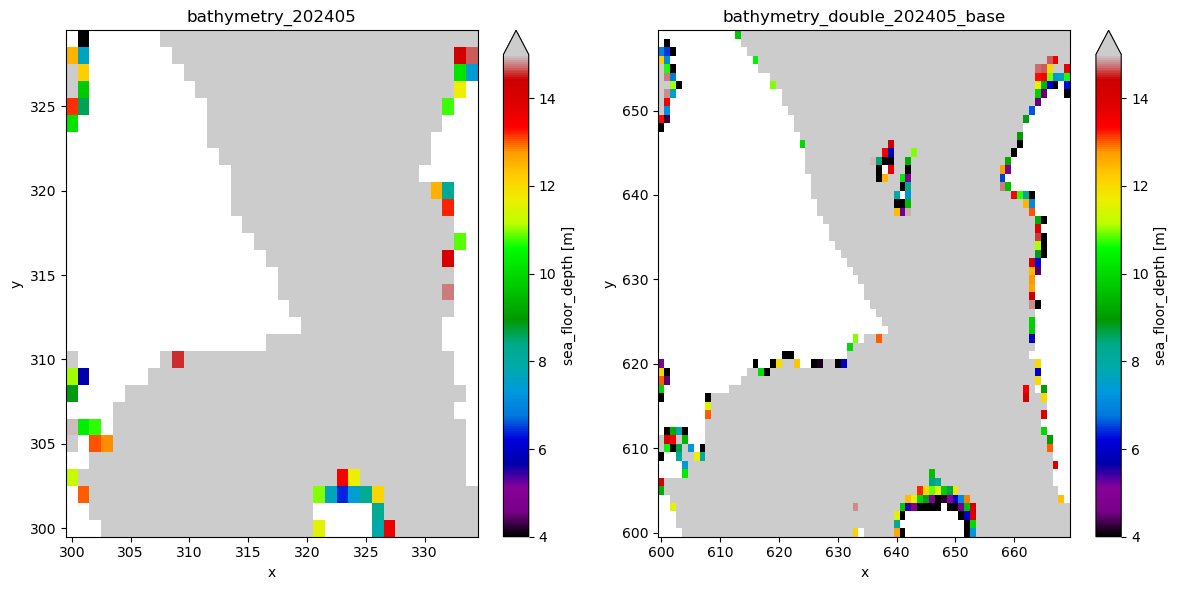

In [82]:
plot_tile(numpy.array([300, 335]), y_slices, bathy, dbl_bathy)

## Tile 5, 11

Lummi Island and Bellingham Bay

* Portage Island is connected to Lummi Point in reality; perhaps an artificial isthmus

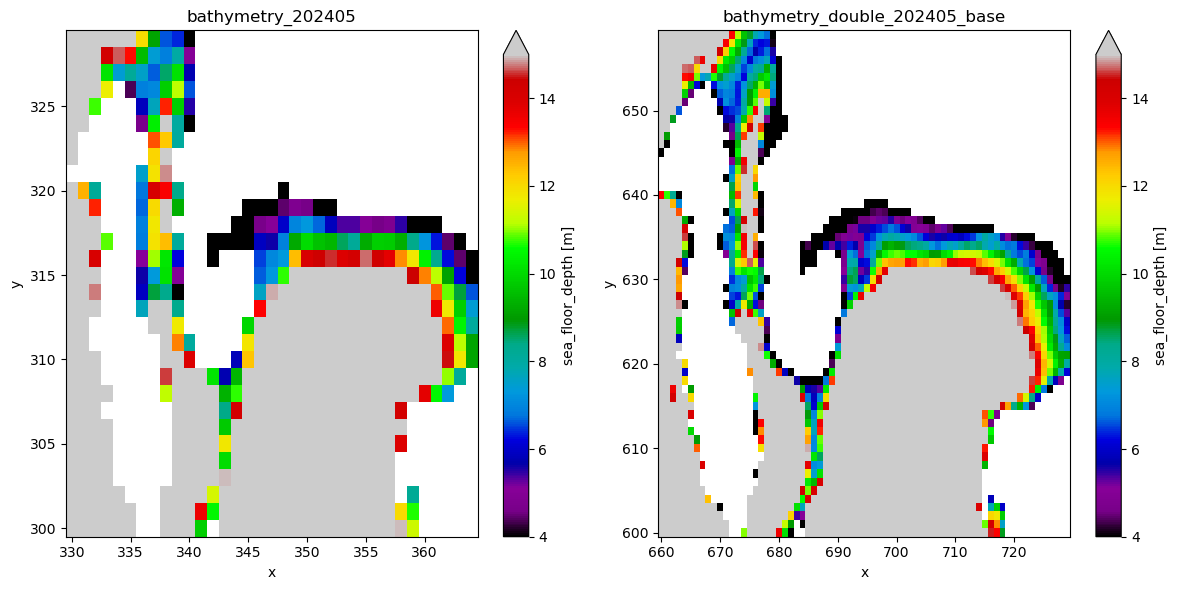

In [83]:
plot_tile(numpy.array([330, 365]), y_slices, bathy, dbl_bathy)

## Tile 5, 12

East bit of Bellingham Bay

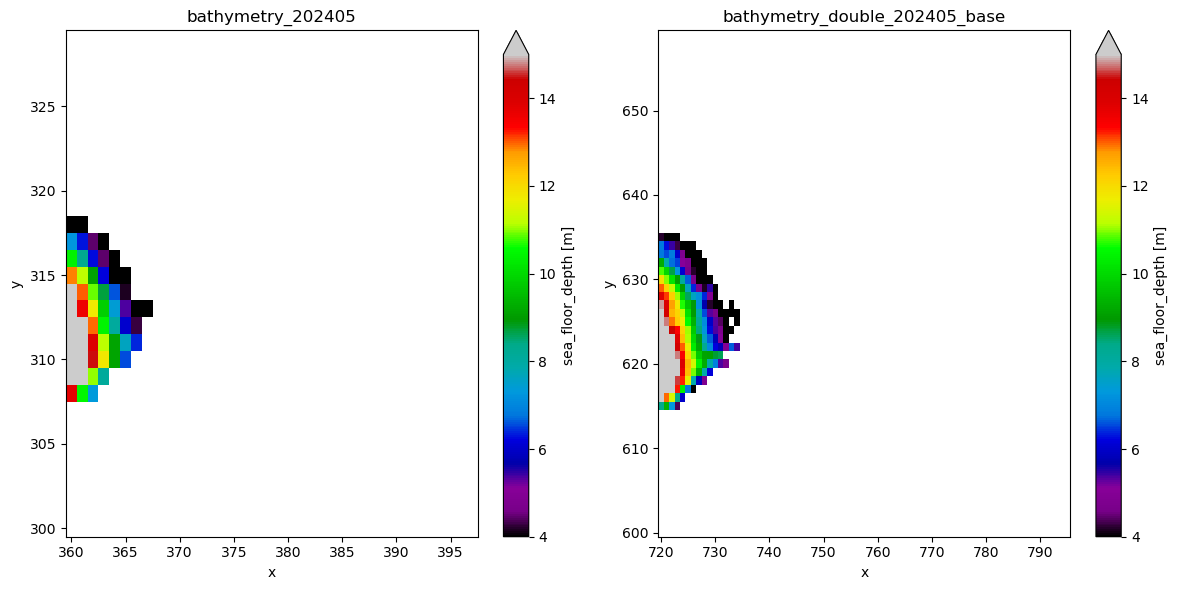

In [84]:
plot_tile(numpy.array([360, 398]), y_slices, bathy, dbl_bathy)